## **Постановка задачи**

#### **Формулировка задачи:**
Создать модель для прогнозирования будущего потребления электроэнергии домохозяйствами, используя временные ряды потребления. Прогнозы будут способствовать более точному планированию ресурсов, предупреждению перегрузок и оптимизации энергоснабжения.

#### **Цель:**
Предоставить надежные прогнозы потребления электроэнергии, что позволит лучше управлять распределением ресурсов, снизить затраты на обслуживание, оптимизировать энергопотребление и повысить удовлетворенность клиентов.

## **Задача**
На основе временных данных о потреблении электроэнергии домохозяйствами обучить модель машинного обучения, которая сможет прогнозировать будущие значения потребления. Модель должна учитывать временные и сезонные закономерности, а также быть устойчива к внезапным изменениям потребления.

In [1]:
import kagglehub
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
import os
from glob import glob
%matplotlib inline 
data_dir = f".\\daily_dataset"
file_pattern = os.path.join(data_dir, "*.csv")
all_files = glob(file_pattern)
df_list = [pd.read_csv(file) for file in all_files]
data = pd.concat(df_list, ignore_index=True)
data['day'] = pd.to_datetime(data['day'])
data

,LCLid,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min
0,MAC000002,2012-10-12,0.1385,0.154304,0.886,46,0.196034,7.098,0.000
1,MAC000002,2012-10-13,0.1800,0.230979,0.933,48,0.192329,11.087,0.076
2,MAC000002,2012-10-14,0.1580,0.275479,1.085,48,0.274647,13.223,0.070
3,MAC000002,2012-10-15,0.1310,0.213688,1.164,48,0.224483,10.257,0.070
4,MAC000002,2012-10-16,0.1450,0.203521,0.991,48,0.184115,9.769,0.087
...,...,...,...,...,...,...,...,...,...
3510428,MAC005019,2014-02-24,0.0915,0.091938,0.192,48,0.029466,4.413,0.046
3510429,MAC005019,2014-02-25,0.0735,0.251104,1.455,48,0.369093,12.053,0.029
3510430,MAC005019,2014-02-26,0.0740,0.117604,0.554,48,0.112632,5.645,0.031
3510431,MAC005019,2014-02-27,0.0605,0.086521,0.449,48,0.076162,4.153,0.029


In [2]:
 data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3510433 entries, 0 to 3510432
Data columns (total 9 columns):
 #   Column         Dtype         
---  ------         -----         
 0   LCLid          object        
 1   day            datetime64[ns]
 2   energy_median  float64       
 3   energy_mean    float64       
 4   energy_max     float64       
 5   energy_count   int64         
 6   energy_std     float64       
 7   energy_sum     float64       
 8   energy_min     float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(1)
memory usage: 241.0+ MB


In [3]:
data.describe()

,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min
count,3510433,3.510403e+06,3.510403e+06,3.510403e+06,3.510433e+06,3.499102e+06,3.510403e+06,3.510403e+06
mean,2013-03-27 21:09:43.463408128,1.587395e-01,2.117305e-01,8.345210e-01,4.780364e+01,1.726673e-01,1.012414e+01,5.962578e-02
min,2011-11-23 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2012-10-21 00:00:00,6.700000e-02,9.808333e-02,3.460000e-01,4.800000e+01,6.911626e-02,4.682000e+00,2.000000e-02
50%,2013-03-30 00:00:00,1.145000e-01,1.632917e-01,6.880000e-01,4.800000e+01,1.327910e-01,7.815000e+00,3.900000e-02
75%,2013-09-10 00:00:00,1.910000e-01,2.624583e-01,1.128000e+00,4.800000e+01,2.293124e-01,1.256900e+01,7.100000e-02
max,2014-02-28 00:00:00,6.970500e+00,6.928250e+00,1.076100e+01,4.800000e+01,4.024569e+00,3.325560e+02,6.524000e+00
std,NaN,1.701865e-01,1.908460e-01,6.683156e-01,2.810982e+00,1.531208e-01,9.128793e+00,8.701312e-02


In [4]:
data.columns

Index(['LCLid', 'day', 'energy_median', 'energy_mean', 'energy_max',
       'energy_count', 'energy_std', 'energy_sum', 'energy_min'],
      dtype='object')

* LCLid - Идентификатор домохозяйства или устройства смарт-метра.

* day - Дата считывание данных.

* energy_median - Медианное значение потребления энергии за день для данного домохозяйства.

* energy_mean - Среднее потребление энергии за день.

* energy_max - Максимальное значение потребления энергии за день.

* energy_count - Количество измерений энергии, проведенных за день.

* energy_std - Стандартное отклонение потребления энергии за день.

* energy_sum - Суммарное потребление энергии за день.

* energy_min - Минимальное значение потребления энергии за день.

In [5]:
data.nunique()

LCLid               5566
day                  829
energy_median      10374
energy_mean       359433
energy_max          6425
energy_count          44
energy_std       3127316
energy_sum        419516
energy_min          2149
dtype: int64

## Проверим количество пропущенных значений для каждой колонны:

In [6]:
data.isna().sum()

LCLid                0
day                  0
energy_median       30
energy_mean         30
energy_max          30
energy_count         0
energy_std       11331
energy_sum          30
energy_min          30
dtype: int64

## Процент пропущенных полей:

In [7]:
print(data.isna().sum().sum() / (len(data) * len(data.columns)) * 100)
data.dropna(inplace=True)
data.isna().sum()

0.03633929679520067


LCLid            0
day              0
energy_median    0
energy_mean      0
energy_max       0
energy_count     0
energy_std       0
energy_sum       0
energy_min       0
dtype: int64

## Количество элементов в каждом классе:

In [8]:
data_copy= data.copy()
data_copy['day'] = pd.to_datetime(data_copy['day'])

# Добавляем признак "Месяц"
data_copy['month'] = data_copy['day'].dt.month

# Добавляем признак "День недели"
data_copy['day_of_week'] = data_copy['day'].dt.dayofweek  # Понедельник=0, воскресенье=6

# Добавляем признак "Сезон"
def get_season(month):
    if month in [12, 1, 2]:
        return 'winter'
    elif month in [3, 4, 5]:
        return 'spring'
    elif month in [6, 7, 8]:
        return 'summer'
    else:
        return 'autumn'

data_copy['season'] = data_copy['month'].apply(get_season)
quartiles = data_copy['energy_sum'].quantile([0.25, 0.5, 0.75])
very_low_threshold = quartiles[0.25]
medium_threshold = quartiles[0.5]
high_threshold = quartiles[0.75]

# Функция для присвоения категорий
def categorize_energy(energy):
    if energy <= very_low_threshold:
        return 0  # Very Low
    elif energy <= medium_threshold:
        return 1  # Low
    elif energy <= high_threshold:
        return 2  # Medium
    else:
        return 3  # High

# Применяем функцию для создания нового признака
data_copy['energy_category'] = data_copy['energy_sum'].apply(categorize_energy)
data_copy.head()


,LCLid,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min,month,day_of_week,season,energy_category
0,MAC000002,2012-10-12,0.1385,0.154304,0.886,46,0.196034,7.098,0.000,10,4,autumn,1
1,MAC000002,2012-10-13,0.1800,0.230979,0.933,48,0.192329,11.087,0.076,10,5,autumn,2
2,MAC000002,2012-10-14,0.1580,0.275479,1.085,48,0.274647,13.223,0.070,10,6,autumn,3
3,MAC000002,2012-10-15,0.1310,0.213688,1.164,48,0.224483,10.257,0.070,10,0,autumn,2
4,MAC000002,2012-10-16,0.1450,0.203521,0.991,48,0.184115,9.769,0.087,10,1,autumn,2


In [9]:
data_copy['season'].value_counts()


season
winter    988518
autumn    948372
summer    896000
spring    666212
Name: count, dtype: int64

In [10]:
data_copy['energy_category'].value_counts()


energy_category
0    874856
2    874801
3    874740
1    874705
Name: count, dtype: int64

In [11]:
data_copy['month'].value_counts()

month
1     341782
12    337200
10    325430
11    321002
8     310638
2     309536
7     307591
9     301940
6     277771
5     256431
4     209639
3     200142
Name: count, dtype: int64

# Исключим ненужные данные

In [12]:
data_copy = data_copy.drop(['LCLid'], axis=1)
print(data_copy.columns)
print('len: ', len(data_copy.columns))
data_copy

Index(['day', 'energy_median', 'energy_mean', 'energy_max', 'energy_count',
       'energy_std', 'energy_sum', 'energy_min', 'month', 'day_of_week',
       'season', 'energy_category'],
      dtype='object')
len:  12


,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min,month,day_of_week,season,energy_category
0,2012-10-12,0.1385,0.154304,0.886,46,0.196034,7.098,0.000,10,4,autumn,1
1,2012-10-13,0.1800,0.230979,0.933,48,0.192329,11.087,0.076,10,5,autumn,2
2,2012-10-14,0.1580,0.275479,1.085,48,0.274647,13.223,0.070,10,6,autumn,3
3,2012-10-15,0.1310,0.213688,1.164,48,0.224483,10.257,0.070,10,0,autumn,2
4,2012-10-16,0.1450,0.203521,0.991,48,0.184115,9.769,0.087,10,1,autumn,2
...,...,...,...,...,...,...,...,...,...,...,...,...
3510427,2014-02-23,0.1180,0.179563,0.759,48,0.175669,8.619,0.048,2,6,winter,2
3510428,2014-02-24,0.0915,0.091938,0.192,48,0.029466,4.413,0.046,2,0,winter,0
3510429,2014-02-25,0.0735,0.251104,1.455,48,0.369093,12.053,0.029,2,1,winter,2
3510430,2014-02-26,0.0740,0.117604,0.554,48,0.112632,5.645,0.031,2,2,winter,1


# Избавляемся от выбросов

In [13]:
data_copy = data_copy[data_copy['energy_mean'] > 0]
data_copy = data_copy[data_copy['energy_max'] > 0]
data_copy = data_copy[data_copy['energy_min'] >= 0]
data_copy = data_copy[data_copy['energy_sum'] > 0]
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    return df[~((df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR)))]
data_copy = remove_outliers(data_copy, 'energy_mean')
data_copy = remove_outliers(data_copy, 'energy_max')
data_copy = remove_outliers(data_copy, 'energy_min')
data_copy = remove_outliers(data_copy, 'energy_sum')
data_copy = data_copy.drop_duplicates()
data_copy.describe()

,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min,month,day_of_week,energy_category
count,2998189,2.998189e+06,2.998189e+06,2.998189e+06,2.998189e+06,2.998189e+06,2.998189e+06,2.998189e+06,2.998189e+06,2.998189e+06,2.998189e+06
mean,2013-03-26 16:28:40.581056256,1.165869e-01,1.596906e-01,6.824487e-01,4.795700e+01,1.379608e-01,7.657221e+00,4.147502e-02,6.765974e+00,2.983019e+00,1.278798e+00
min,2011-11-23 00:00:00,0.000000e+00,2.083333e-05,1.000000e-03,8.000000e+00,0.000000e+00,1.000000e-03,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,2012-10-16 00:00:00,6.200000e-02,9.064583e-02,3.160000e-01,4.800000e+01,6.348962e-02,4.345000e+00,1.800000e-02,4.000000e+00,1.000000e+00,0.000000e+00
50%,2013-04-03 00:00:00,1.015000e-01,1.446250e-01,6.040000e-01,4.800000e+01,1.175543e-01,6.934000e+00,3.500000e-02,7.000000e+00,3.000000e+00,1.000000e+00
75%,2013-09-07 00:00:00,1.565000e-01,2.154583e-01,9.650000e-01,4.800000e+01,1.935708e-01,1.033200e+01,5.900000e-02,1.000000e+01,5.000000e+00,2.000000e+00
max,2014-02-27 00:00:00,7.110000e-01,5.089688e-01,2.100000e+00,4.800000e+01,7.311101e-01,1.997500e+01,1.340000e-01,1.200000e+01,6.000000e+00,3.000000e+00
std,NaN,7.270921e-02,8.883719e-02,4.474939e-01,8.740299e-01,9.490941e-02,4.261184e+00,3.021149e-02,3.481067e+00,1.993869e+00,1.029662e+00


# Анализ данных
#### Визуализировать данные и вычислить основные характеристики

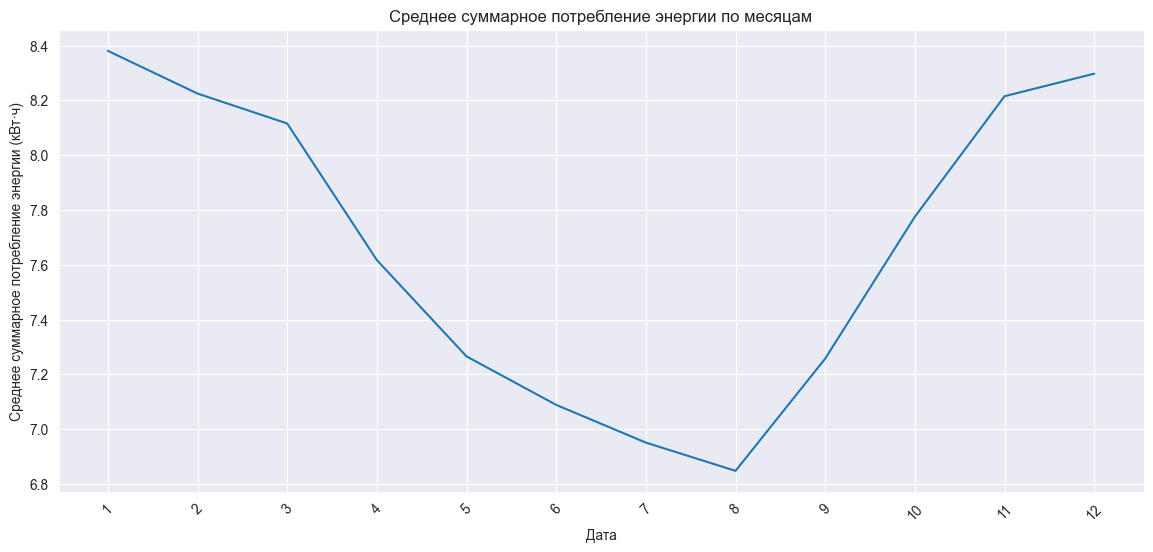

In [14]:
import seaborn as sns
monthly_data = data_copy.groupby('month')['energy_sum'].mean().reset_index()

plt.figure(figsize=(14, 6))
plt.plot(monthly_data['month'].astype(str), monthly_data['energy_sum'])
plt.title("Среднее суммарное потребление энергии по месяцам")
plt.xlabel("Дата")
plt.ylabel("Среднее суммарное потребление энергии (кВт·ч)")
plt.xticks(rotation=45)
plt.show()

In [15]:
print(data[['energy_mean', 'energy_median', 'energy_max', 'energy_min', 'energy_sum']].describe())

        energy_mean  energy_median    energy_max    energy_min    energy_sum
count  3.499102e+06   3.499102e+06  3.499102e+06  3.499102e+06  3.499102e+06
mean   2.118233e-01   1.586612e-01  8.366252e-01  5.922736e-02  1.015625e+01
std    1.903080e-01   1.695142e-01  6.681264e-01  8.500841e-02  9.125979e+00
min    0.000000e+00   0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
25%    9.827083e-02   6.700000e-02  3.480000e-01  2.000000e-02  4.711000e+00
50%    1.634583e-01   1.145000e-01  6.900000e-01  3.900000e-02  7.838000e+00
75%    2.626042e-01   1.910000e-01  1.130000e+00  7.100000e-02  1.259100e+01
max    6.928250e+00   6.970500e+00  1.076100e+01  6.394000e+00  3.325560e+02


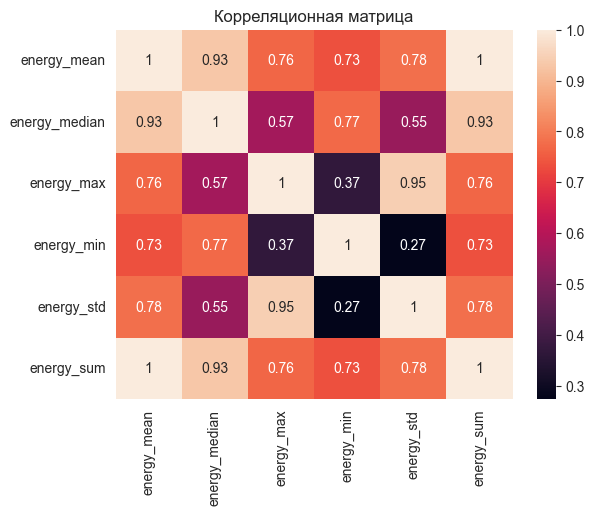

In [16]:
correlation_matrix = data[['energy_mean', 'energy_median', 'energy_max', 'energy_min', 'energy_std', 'energy_sum']].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title("Корреляционная матрица")
plt.show()

# Обработка категориальных признаков

In [17]:
data_dummies = pd.get_dummies(data_copy, columns=['season', 'month','energy_category'], drop_first=True)
data_dummies.head()

,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min,day_of_week,season_spring,...,month_6,month_7,month_8,month_9,month_10,month_11,month_12,energy_category_1,energy_category_2,energy_category_3
0,2012-10-12,0.1385,0.154304,0.886,46,0.196034,7.098,0.000,4,False,...,False,False,False,False,True,False,False,True,False,False
1,2012-10-13,0.1800,0.230979,0.933,48,0.192329,11.087,0.076,5,False,...,False,False,False,False,True,False,False,False,True,False
2,2012-10-14,0.1580,0.275479,1.085,48,0.274647,13.223,0.070,6,False,...,False,False,False,False,True,False,False,False,False,True
3,2012-10-15,0.1310,0.213688,1.164,48,0.224483,10.257,0.070,0,False,...,False,False,False,False,True,False,False,False,True,False
4,2012-10-16,0.1450,0.203521,0.991,48,0.184115,9.769,0.087,1,False,...,False,False,False,False,True,False,False,False,True,False


### Проведем нормализацию

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_dummies[['energy_mean', 'energy_median', 'energy_max', 'energy_min', 'energy_sum']] = scaler.fit_transform(data_dummies[['energy_mean', 'energy_median', 'energy_max', 'energy_min', 'energy_sum']])

In [19]:
from sklearn.model_selection import train_test_split

X = data_dummies.drop(['energy_sum', 'day'], axis=1)
y = data_dummies['energy_sum']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# K-ближайших

In [20]:
X_train

,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_min,day_of_week,season_spring,season_summer,season_winter,...,month_6,month_7,month_8,month_9,month_10,month_11,month_12,energy_category_1,energy_category_2,energy_category_3
633860,-1.087714,-0.722096,-0.182011,48,0.132748,-0.975623,4,False,False,False,...,False,False,False,False,False,True,False,False,False,False
466271,-0.902043,-0.815900,-0.966379,48,0.067981,-0.247423,2,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2795714,-0.455057,-0.629933,-0.523915,48,0.085235,-0.777023,4,False,False,False,...,False,False,False,True,False,False,False,True,False,False
2525891,0.067573,-0.020203,-0.559670,48,0.103833,0.017377,2,False,False,True,...,False,False,False,False,False,False,True,True,False,False
2127267,-0.847030,-0.937612,-0.850176,48,0.058256,-0.512223,3,False,False,False,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011273,1.071572,0.361816,-0.691515,48,0.053501,1.473777,0,False,False,True,...,False,False,False,False,False,False,False,False,True,False
2788598,-0.626975,0.402152,2.470540,48,0.349742,-0.313623,1,False,False,True,...,False,False,False,False,False,False,False,False,True,False
2644424,1.415408,1.820946,0.705152,48,0.236473,2.069577,4,False,True,False,...,True,False,False,False,False,False,False,False,False,True
3261523,-0.764509,-0.974899,-1.037888,48,0.059027,-1.108023,1,False,True,False,...,True,False,False,False,False,False,False,False,False,False


In [21]:
from sklearn.neighbors import KNeighborsRegressor
import os
os.environ["LOKY_MAX_CPU_COUNT"] = "12"
knn = KNeighborsRegressor(n_neighbors = 3)
knn.fit(X_train, Y_train)

# Предсказание на тестовой выборке
y_test_predict = knn.predict(X_test)

# Вычисление ошибки на обучающей и тестовой выборках
err_test = 1 - knn.score(X_test, Y_test)
err_train = 1 - knn.score(X_train, Y_train)
print('Ошибка на обучении: ' + str(err_train * 100) + '%')
print('Ошибка на тесте: ' + str(err_test * 100) + '%')

Ошибка на обучении: 0.14510214682926792%
Ошибка на тесте: 0.2934901948954738%


In [22]:
from sklearn.metrics import rand_score

rand_s = rand_score(Y_test, y_test_predict)
print('Оценка RAND: ', rand_s)

D:\Development\UNN\UNN_ML_2024\venv\lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


Оценка RAND:  0.9999709716012807


Ошибки на обучающей и тестовой выборках близки друг к другу: 0.946 на обучении и 0.954 на тесте.
Низкая разница между ошибками на тренировочной и тестовой выборках говорит о том, что модель KNN не переобучилась и показывает стабильные результаты на обеих выборках. Однако абсолютные значения ошибок относительно высокие, что указывает на то, что модель KNN, возможно, не является оптимальным выбором для данной задачи.

# PCA

In [23]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [24]:
scaled_data_train = pd.DataFrame(X_train_std)
scaled_data_test = pd.DataFrame(X_test_std)

<Axes: >

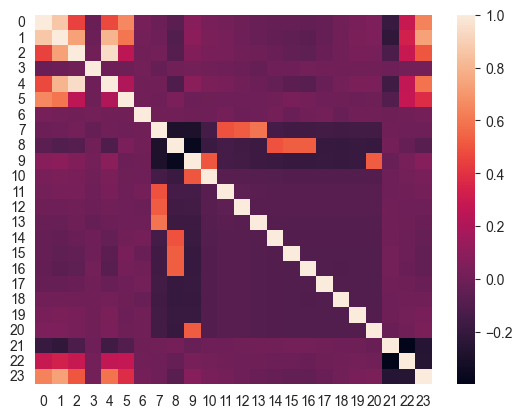

In [25]:
sns.heatmap(scaled_data_train.corr())

In [52]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # X — ваши данные с числовыми признаками

# Применение PCA
pca = PCA(n_components=18)  
X_pca = pca.fit_transform(X_scaled)
print(len(X_pca[:, 0]),len( X_pca[:, 1]),len(y))

2998189 2998189 2998189


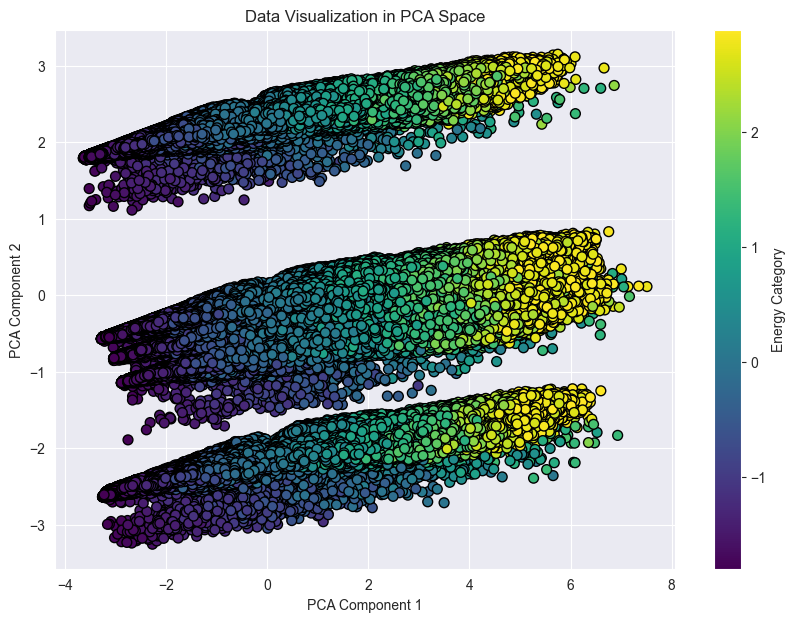

In [54]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y[:len( X_pca[:, 1])], cmap='viridis', edgecolor='k', s=50)  # y — метки классов
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Data Visualization in PCA Space')
plt.colorbar(label='Energy Category')
plt.show()

In [53]:
explained_variance = pca.explained_variance_ratio_
print("Доля объясненной дисперсии каждой компонентой:", explained_variance)
print("Суммарная доля объясненной дисперсии:", explained_variance.sum())

Доля объясненной дисперсии каждой компонентой: [0.17582962 0.09908927 0.09380558 0.0604601  0.05646915 0.04775555
 0.04662309 0.04597265 0.04574223 0.045684   0.04503995 0.0444564
 0.04404156 0.04148793 0.04052297 0.03741953 0.01302567 0.01082544]
Суммарная доля объясненной дисперсии: 0.9942506791527308


Использование 18 компонент позволяет получить почти полное представление исходных данных с сокращенной размерностью. Это должно положительно сказаться на качестве предсказаний KNN, сохраняя баланс между точностью и эффективностью вычислений. С 99.4% объясненной дисперсии модель фактически сохраняет всю информацию из исходных данных, что исключает потери значимых характеристик и снижает вероятность ухудшения качества предсказаний из-за недостатка информации.

# Теперь попробуем использовать Random forest

In [29]:
from types import new_class
from sklearn.ensemble import RandomForestRegressor

rfc = RandomForestRegressor(random_state=5)
rfc.fit(X_train, Y_train)

RandomForestRegressor(random_state=5)

In [32]:
pred_labeles = rfc.predict(X_test)
rand_s = rand_score(Y_test, pred_labeles)
print('Оценка RAND: ', rand_s)
# 3. Предсказания и оценка
from sklearn.metrics import classification_report, confusion_matrix


Оценка RAND:  0.9999680763316645


D:\Development\UNN\UNN_ML_2024\venv\lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


Модель Random Forest продемонстрировала почти идеальные результаты, что может указывать на то, что:

 Оценка Rand на обучающей выборке показывает значение 0.9999, что указывает на высокую точность. Однако, поскольку Rand Score не предназначен для регрессионных задач, его использование здесь приводит к некорректной оценке, что отражено в предупреждении.  Случайный лес хорошо справляется с нелинейными зависимостями и, вероятно, показывает лучшее качество по сравнению с KNN.

In [37]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Получение предсказаний модели на тестовом наборе данных
y_test_predict = rfc.predict(X_test)

# Вычисление метрик
mse = mean_squared_error(Y_test, y_test_predict)
mae = mean_absolute_error(Y_test, y_test_predict)
r2 = r2_score(Y_test, y_test_predict)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R^2 Score:", r2)


Mean Squared Error (MSE): 6.597954090080865e-06
Mean Absolute Error (MAE): 5.864645969174757e-05
R^2 Score: 0.9999934071238287


MSE указывает на то, что среднеквадратичное отклонение предсказаний модели от фактических значений крайне мало. Поскольку MSE чувствителен к большим ошибкам, низкое значение говорит о высокой точности модели.

MAE также очень низкий, что подтверждает, что предсказания модели очень близки к фактическим значениям в среднем. MAE меньше подвержен влиянию выбросов, и его низкое значение говорит о том, что модель стабильно предсказывает значения с минимальной ошибкой.

Это практически идеальный коэффициент детерминации, показывающий, что модель объясняет 99.99% вариативности в данных. Такой высокий R^2
указывает, что модель случайного леса практически идеально подходит для предсказания потребления энергии в этом наборе данных.

Модель Random Forest показала почти идеальные результаты на наборе данных. Настолько высокое качество предсказаний может быть связано с хорошей адаптацией модели к данным, особенно если они имеют явные зависимости и повторяющиеся паттерны, которые модель смогла успешно уловить.


### Найдем оптимальное значение гиперпараметра n_estimators (количество деревьев)


In [38]:
n_estimators_arr = [i for i in range(1, 10)] + [i for i in range(10, 50, 10)]
test_err = []
train_err = []
for n in n_estimators_arr:
    rfc_model = RandomForestRegressor(n_estimators = n)
    rfc_model.fit(X_train, Y_train)

    y_train_pred = rfc_model.predict(X_train)
    y_test_pred = rfc_model.predict(X_test)
    train_err.append(np.mean(Y_train != y_train_pred))
    test_err.append(np.mean(Y_test != y_test_pred))
    print('n:', n)

n: 1
n: 2
n: 3
n: 4
n: 5
n: 6
n: 7
n: 8
n: 9
n: 10
n: 20
n: 30
n: 40


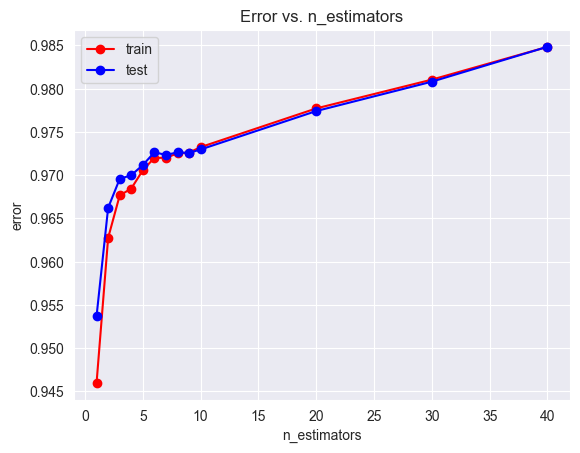

In [39]:
plt.plot(n_estimators_arr, train_err, 'r-o', label = 'train')
plt.plot(n_estimators_arr, test_err, 'b-o', label = 'test')
plt.title('Error vs. n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('error')
plt.legend()
pass

In [40]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.9460040666218896 0.9537254143333145


Рост ошибки с увеличением n_estimators:
  * Обычно ошибка модели случайного леса стабилизируется или даже уменьшается по мере увеличения количества деревьев, так как большее число деревьев позволяет модели усреднять предсказания и снижать вариативность.
  * Однако на этом графике ошибка (как на обучающей, так и на тестовой выборках) растет по мере увеличения n_estimators, что не является обычным поведением.

Близость ошибок на обучающей и тестовой выборках:
  * Ошибки на обучающей и тестовой выборках очень близки друг к другу, что указывает на то, что модель не переобучается. Однако это также может указывать на недостаточное количество информации или особенности данных, которые случайный лес не может уловить.

Наименьшая ошибка при небольшом количестве деревьев:
   * Ошибка на обучении и тестировании достигает минимального значения при низких значениях n_estimators (примерно от 5 до 10 деревьев). Это может означать, что для данной задачи случайный лес с небольшим числом деревьев работает лучше, чем с большим.

# Вывод

Для прогнозирования потребления энергии наиболее подходящей моделью является случайный лес, так как он лучше улавливает сложные зависимости в данных.
Так как полученная модель частично соответствует требованиям задачи. А именно она учитывает временные и сезонные закономерности и показывает высокую точность (низкие значения ошибок). Однако из-за использования подходов, не учитывающих временные зависимости (KNN и Random Forest), модель может не полностью удовлетворять задачи прогнозирования временных данных, особенно в условиях резких изменений потребления. Из-за этого в будущем будут рассмотрены другие модели, которые будут учитывать временные зависимости, например нейронные сети.


